## Programming AI - CA2 

In [97]:
!pip install pandas scikit-learn seaborn matplotlib
!pip install tensorflow==2.12.0
!pip install keras==2.12.0

/bin/bash: /home/jozoppi/pyconda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/jozoppi/pyconda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/jozoppi/pyconda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


# Descriptive statistics.

We want to understand how is this dataset, the variance, the medium values and the distribution of the type. The shape of dataset and how is formed. 
We also noticed that the id is not needed for our goals. So sooner or later we'll get rid of that. There are no missing values in the current dataset so there is need to drop value except for id and type.

In [98]:
import pandas as pd
import numpy as np
glass_df = pd.read_csv('glass_data.csv')
# Display the first few rows of the dataset
glass_df.head(10)


,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [99]:
glass_df.describe()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [100]:
glass_df.dtypes

id        int64
ri      float64
na      float64
mg      float64
al      float64
si      float64
k       float64
ca      float64
ba      float64
fe      float64
type      int64
dtype: object

In [101]:
glass_df.mean()


id      107.500000
ri        1.518365
na       13.407850
mg        2.684533
al        1.444907
si       72.650935
k         0.497056
ca        8.956963
ba        0.175047
fe        0.057009
type      2.780374
dtype: float64

In [102]:
glass_df.median()


id      107.50000
ri        1.51768
na       13.30000
mg        3.48000
al        1.36000
si       72.79000
k         0.55500
ca        8.60000
ba        0.00000
fe        0.00000
type      2.00000
dtype: float64

In [103]:
glass_df.mode().iloc[0]

id       1.0000
ri       1.5159
na      13.0000
mg       0.0000
al       1.5400
si      72.8600
k        0.0000
ca       8.0300
ba       0.0000
fe       0.0000
type     2.0000
Name: 0, dtype: float64

In [104]:
print("Standard Deviation")
glass_df.std()

Standard Deviation


id      61.920648
ri       0.003037
na       0.816604
mg       1.442408
al       0.499270
si       0.774546
k        0.652192
ca       1.423153
ba       0.497219
fe       0.097439
type     2.103739
dtype: float64

In [105]:
print('Variance')
glass_df.var()

Variance


id      3834.166667
ri         0.000009
na         0.666841
mg         2.080540
al         0.249270
si         0.599921
k          0.425354
ca         2.025366
ba         0.247227
fe         0.009494
type       4.425716
dtype: float64

In [106]:
print('Range')
glass_df.max() - glass_df.min()

Range


id      213.00000
ri        0.02278
na        6.65000
mg        4.49000
al        3.21000
si        5.60000
k         6.21000
ca       10.76000
ba        3.15000
fe        0.51000
type      6.00000
dtype: float64

We want to know how each feature behaves and what happens in order to identify any anomalies. The dataset doens't have categorical data since the categories of glass are encoded with a number so there is not need of one shot encoding. We notice that we might need to scale the data.

<Figure size 1200x600 with 0 Axes>

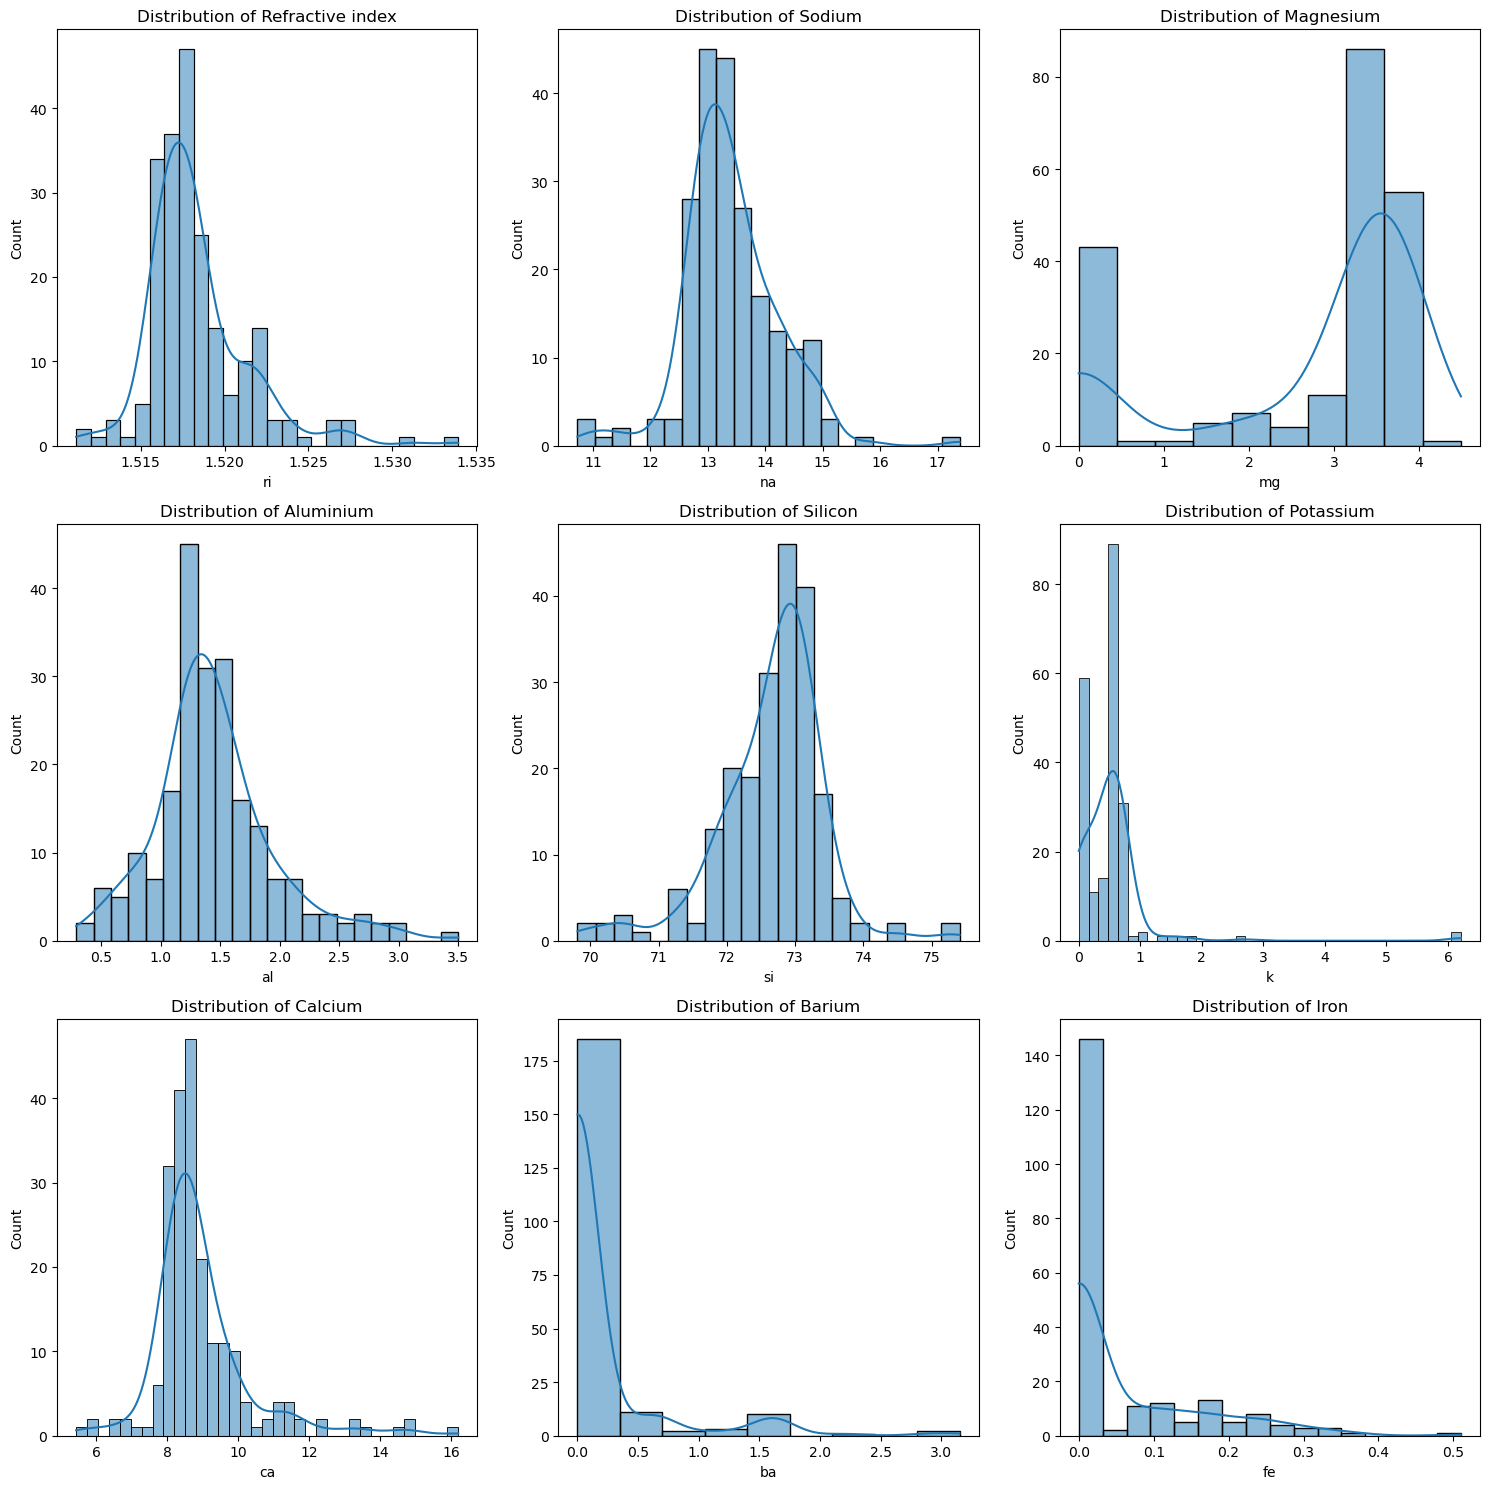

In [107]:
# Visualize the distribution of each feature
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
features = glass_df.drop(columns=['id', 'type'])

# Extended names for features
feature_extended_name = {
   'na': 'Sodium',
   'ri': 'Refractive index',
   'mg': 'Magnesium',
   'al': 'Aluminium',
   'si': 'Silicon',
   'k': 'Potassium',
   'ca': 'Calcium',
   'ba': 'Barium',
   'fe': 'Iron'
}

# Create a histogram for each feature
num_features = len(features.columns)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size

for i, feature in enumerate(features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=features, x=feature, kde=True)
    name = feature_extended_name.get(feature, feature)
    plt.title(f'Distribution of {name}')
    
plt.tight_layout()
plt.show()


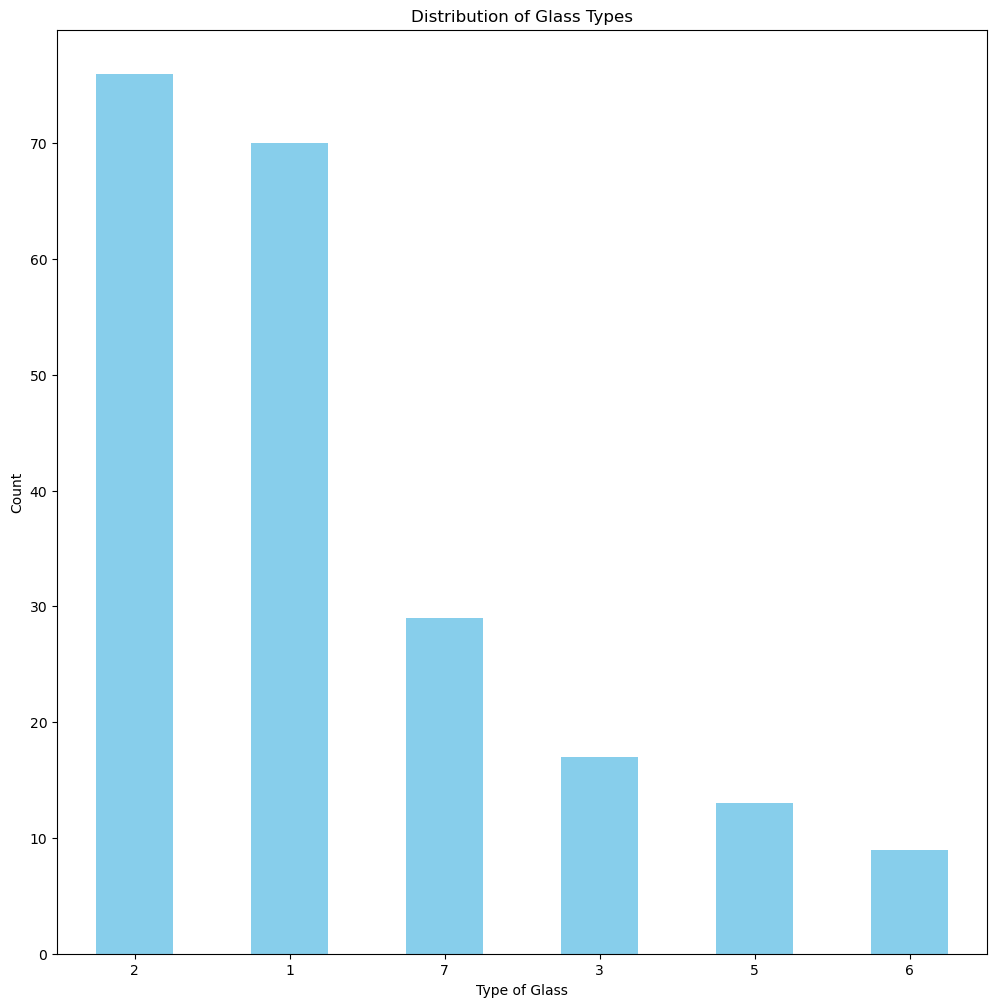

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
type_counts = glass_df['type'].value_counts()
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Glass Types')
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [109]:
glass_df['type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type, dtype: int64

The observation that we've here:
- Dataset 214 items.
- The dataset is unbalanced since:
    - glass type 4 is missing.
    - glass type 2 and type 1 has a higher number of items then the others.
    - glass type 6 has less instances.

Probabally we should use SMOTE before correlation matrix computation and after to see how the unbalancing affects correlations between features. Later we will apply SMOTE.
SMOTE is a data augmentation tecnique it increases the size of the training set by generating many realistic variants of each training instance. In case of a unbalanced dataset, it is used to generate more samples of the less frequent classes. Before doing this we want to detect outliers and remove them.
    

# Detect outliers.
Outliers are data points that significantly deviate from the majority of the data. They can be caused by errors, anomalies, or simply rare events. Outlies can lead to overfitting. Outliers may lead to overfitting if the model tries to fit them perfectly, thus capturing their noise rather than the actual patterns in the data. We decided to ignore outliners. For detecting outliners in classification problem we use Isolation Forest.
## Isolation Forest
The algoritm builds a random forest in which each decision tree is grown randomly: at each node, it pickes a feature randomly, the it picks a random
threasold value to split the dataset in two. This process is repeated until all instances are isolated. Anomalies are usually far from other instances,
so on average they tend to get isolated in fewer steps then normal instances. Once we've indentified the outliners we select and drop them. It's not the best approach since we risk underfit doing but the number is not meaniful in our case, we can drop. Alternative strategy could be repleace with the mean.



Number of outliers detected: 22


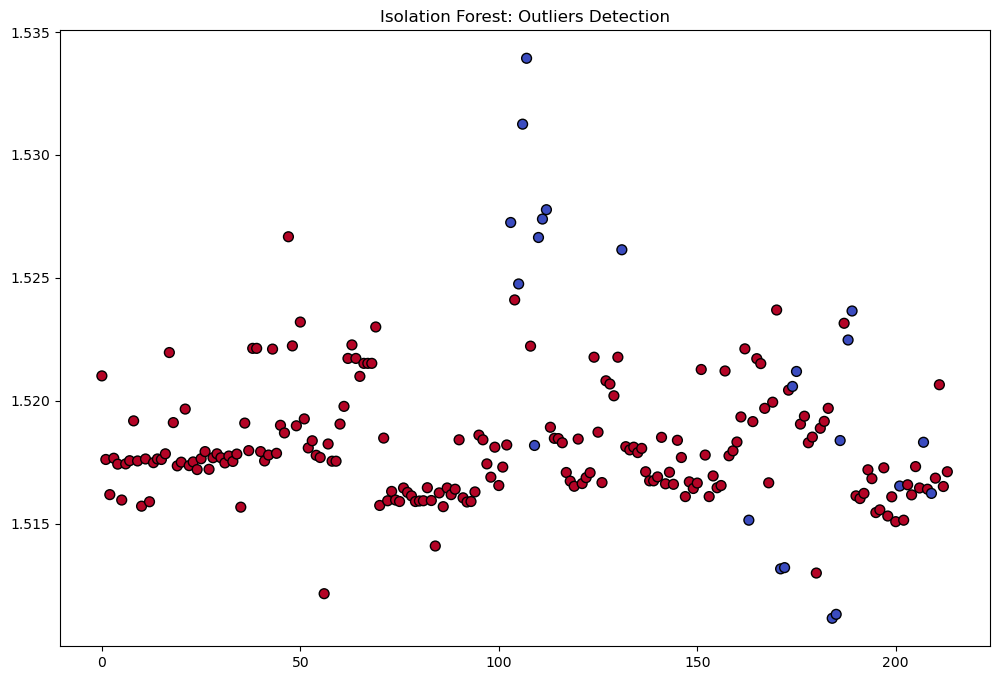

,id,ri,na,mg,al,si,k,ca,ba,fe,type,outlier
103,104,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2,-1
105,106,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2,-1
106,107,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,-1
107,108,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2,-1
109,110,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2,-1
110,111,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2,-1
111,112,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2,-1
112,113,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2,-1
131,132,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,2,-1
163,164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,-1


In [110]:
from sklearn.ensemble import IsolationForest
# Drop the 'id' and 'type' columns for outlier detection
features = glass_df.drop(columns=['type'])
# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model and predict outliers
glass_df['outlier'] = iso_forest.fit_predict(features)

# -1 indicates outliers, 1 indicates inliers
outliers = glass_df[glass_df['outlier'] == -1]
inliers = glass_df[glass_df['outlier'] == 1]

# Display the number of outliers detected
print(f"Number of outliers detected: {len(outliers)}")

# Plot the inliers and outliers
plt.figure(figsize=(12, 8))
plt.scatter(glass_df.index, glass_df['ri'], c=glass_df['outlier'], cmap='coolwarm', edgecolor='k', s=50)
plt.title('Isolation Forest: Outliers Detection')
plt.show()

# Display the outliers
outliers

# Remove the outliners and check again the balancing.

In [111]:
glass_df.count()

id         214
ri         214
na         214
mg         214
al         214
si         214
k          214
ca         214
ba         214
fe         214
type       214
outlier    214
dtype: int64

In [112]:
glass_df = glass_df[glass_df['outlier'] != -1]
glass_df = glass_df.drop(columns=['outlier'])

In [113]:
glass_df.count()

id      192
ri      192
na      192
mg      192
al      192
si      192
k       192
ca      192
ba      192
fe      192
type    192
dtype: int64

In the picture below we show the distribution of the data. It is unbalanced some types of glasses are more present than others and this is a problem. We might want use sampling, SMOTE algorithm to augument the data.

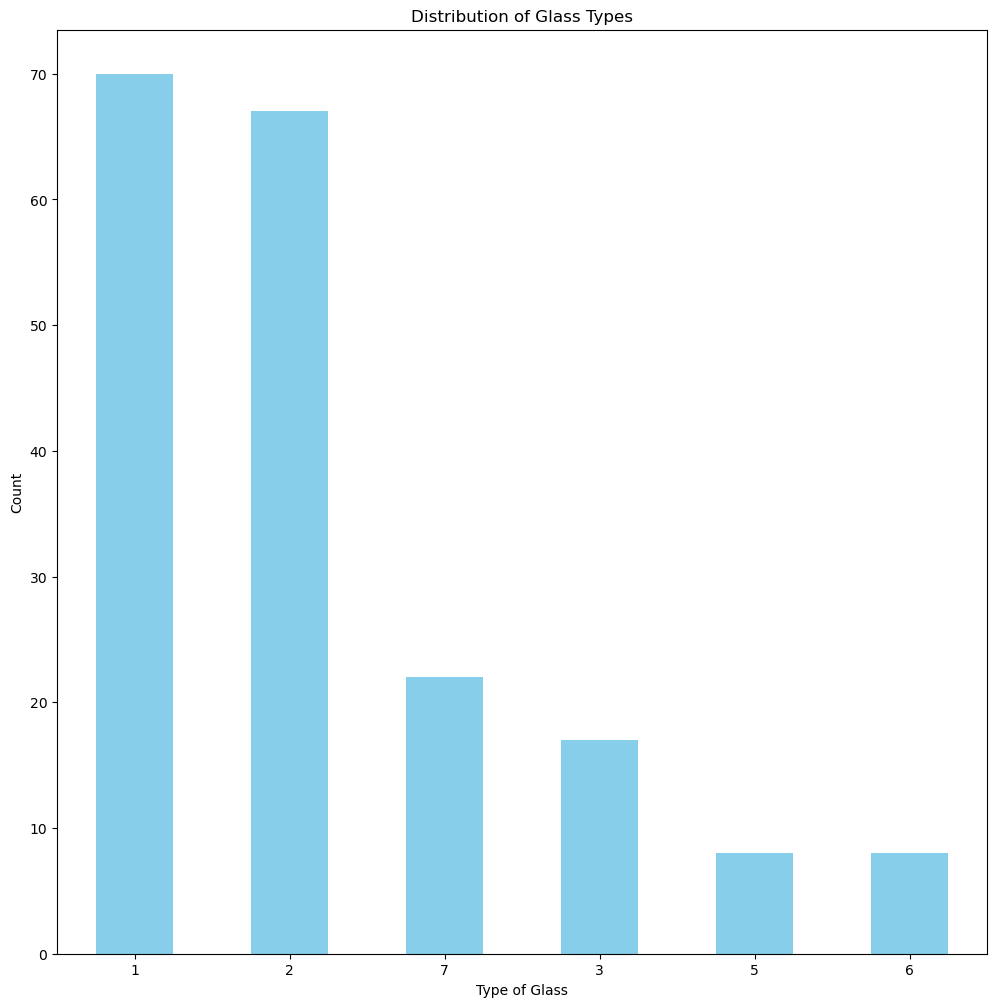

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
type_counts = glass_df['type'].value_counts()
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Glass Types')
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [115]:
glass_df['type'].value_counts()

1    70
2    67
7    22
3    17
5     8
6     8
Name: type, dtype: int64

Now we've remove some data containing outliers. The next step is to rebalance thru SMOTE the dataset. 

In [116]:
!pip install imbalanced-learn

/bin/bash: /home/jozoppi/pyconda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [117]:

glass_df = glass_df.drop(columns=['id'])  

X = glass_df.drop(columns=['type']) 
y = glass_df['type']

# Compute correlation matrix on original data
correlation_matrix_original = glass_df.corr()
print("Correlation Matrix on Original Data:")
print(correlation_matrix_original)


Correlation Matrix on Original Data:
            ri        na        mg        al        si         k        ca  \
ri    1.000000  0.056694  0.077057 -0.535435 -0.641326 -0.317770  0.682650   
na    0.056694  1.000000 -0.515443  0.257375 -0.218881 -0.737161  0.041075   
mg    0.077057 -0.515443  1.000000 -0.647897 -0.382386  0.520749 -0.437191   
al   -0.535435  0.257375 -0.647897  1.000000  0.427754 -0.084501 -0.161135   
si   -0.641326 -0.218881 -0.382386  0.427754  1.000000  0.136207 -0.243004   
k    -0.317770 -0.737161  0.520749 -0.084501  0.136207  1.000000 -0.378233   
ca    0.682650  0.041075 -0.437191 -0.161135 -0.243004 -0.378233  1.000000   
ba   -0.166051  0.544451 -0.673522  0.509793  0.268762 -0.511066 -0.062972   
fe    0.002661 -0.182187  0.180491 -0.151436 -0.058938  0.145233 -0.046220   
type -0.151150  0.549827 -0.852899  0.655184  0.325234 -0.561308  0.237615   

            ba        fe      type  
ri   -0.166051  0.002661 -0.151150  
na    0.544451 -0.182187  0.54

In [118]:


# Compute correlation matrix on original data
correlation_matrix_raw = glass_df.corr()
print("Correlation Matrix on Unbalanced data")
print(correlation_matrix_raw)


Correlation Matrix on Unbalanced data
            ri        na        mg        al        si         k        ca  \
ri    1.000000  0.056694  0.077057 -0.535435 -0.641326 -0.317770  0.682650   
na    0.056694  1.000000 -0.515443  0.257375 -0.218881 -0.737161  0.041075   
mg    0.077057 -0.515443  1.000000 -0.647897 -0.382386  0.520749 -0.437191   
al   -0.535435  0.257375 -0.647897  1.000000  0.427754 -0.084501 -0.161135   
si   -0.641326 -0.218881 -0.382386  0.427754  1.000000  0.136207 -0.243004   
k    -0.317770 -0.737161  0.520749 -0.084501  0.136207  1.000000 -0.378233   
ca    0.682650  0.041075 -0.437191 -0.161135 -0.243004 -0.378233  1.000000   
ba   -0.166051  0.544451 -0.673522  0.509793  0.268762 -0.511066 -0.062972   
fe    0.002661 -0.182187  0.180491 -0.151436 -0.058938  0.145233 -0.046220   
type -0.151150  0.549827 -0.852899  0.655184  0.325234 -0.561308  0.237615   

            ba        fe      type  
ri   -0.166051  0.002661 -0.151150  
na    0.544451 -0.182187  0.5

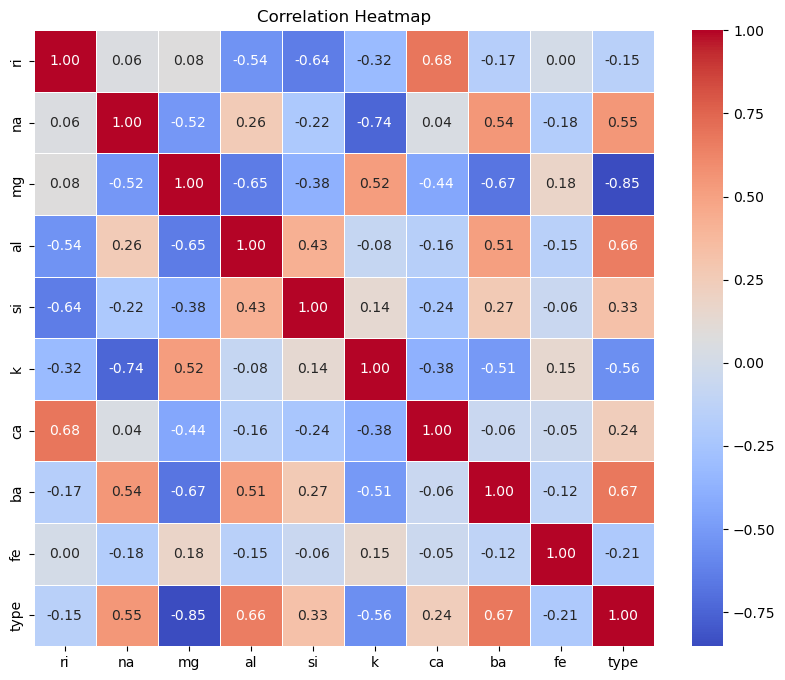

In [119]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title for the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

Now we try to balance the dataset with Data Augumentation.

In [120]:
from imblearn.over_sampling import SMOTE
X = glass_df.drop(columns=['type']) 
y = glass_df['type']

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
glass_df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
glass_df_balanced['type'] = y_resampled

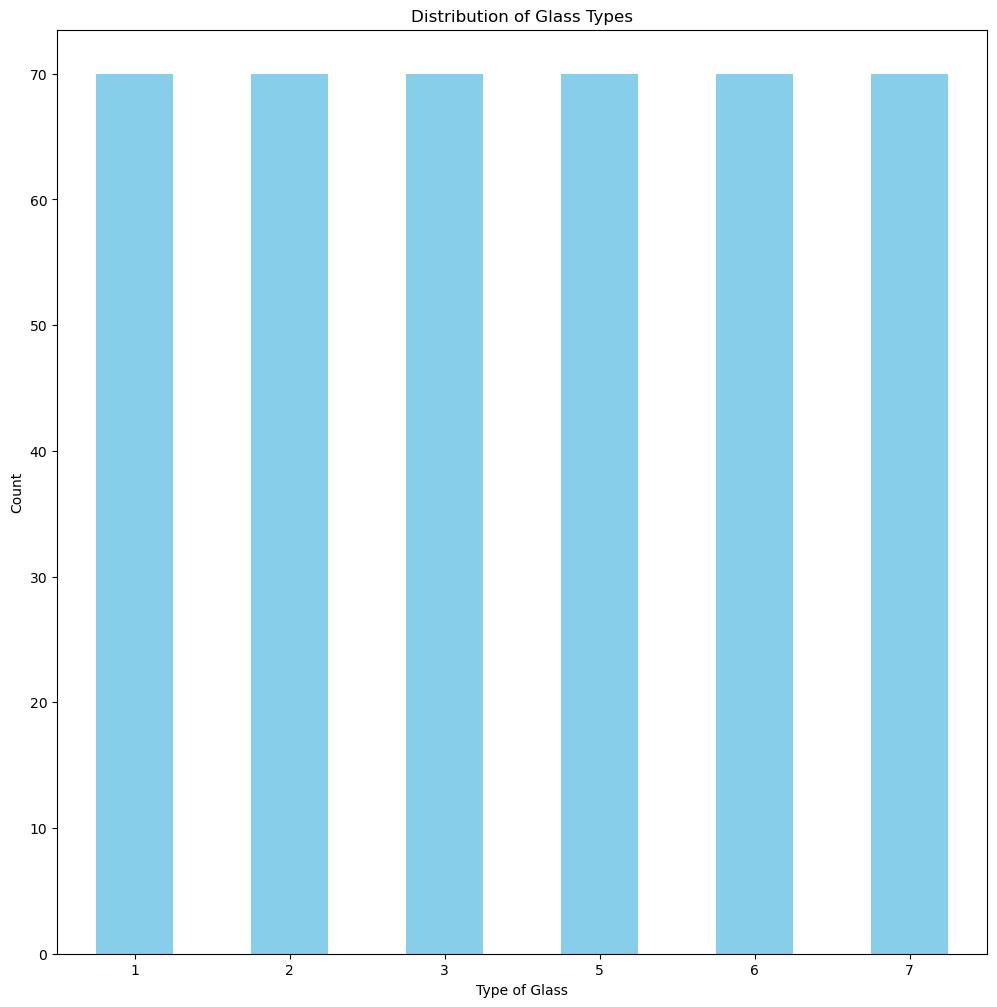

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
type_counts = glass_df_balanced['type'].value_counts()
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Glass Types')
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Data augmentation worked. Now we recompute the correlation matrix to see the effect of data augmentation. We've an equal balanced dataset ready for training.

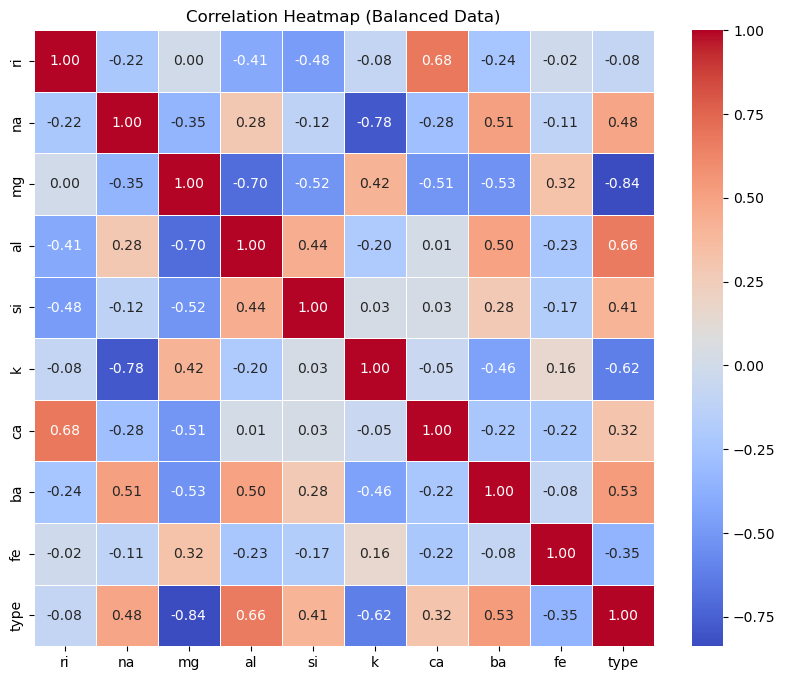

In [122]:
correlation_matrix = glass_df_balanced.corr()
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title for the heatmap
plt.title('Correlation Heatmap (Balanced Data)')

# Display the heatmap
plt.show()

The effect of data augumentation has minimal impact on correlation since SMOTE interpolates between minority class samples, it maintains the relationships between features. We can think about splitting target and training dataset.

In [123]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = glass_df_balanced.drop(columns=['type']) 
y = glass_df_balanced['type'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.min(),X_train.max()

(ri     1.51299
 na    11.03000
 mg     0.00000
 al     0.29000
 si    71.15000
 k      0.00000
 ca     7.08000
 ba     0.00000
 fe     0.00000
 dtype: float64,
 ri     1.52667
 na    15.15000
 mg     3.98000
 al     2.74000
 si    74.55000
 k      1.10000
 ca    12.50000
 ba     1.71000
 fe     0.37000
 dtype: float64)

In [124]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.min(),X_train_scaled.max()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.min(),X_train_scaled.max()

(-3.112704852564166, 4.724666942770337)

In [125]:
X_train_scaled.shape

(336, 9)

In [126]:
X_train_scaled.dtype

dtype('float64')

Set the tensorflow random seed to make the results reproducible. The random weight will be the same everytime we run the notebook.

In [127]:
# Import TensorFlow
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Print TensorFlow version to verify the installation
print("TensorFlow version:", tf.__version__)
tf.random.set_seed(42)

TensorFlow version: 2.12.0


## Model Creation
Some consideration are put in place during model creation:
- We need to individuate the classes. In our case 9, this means thet the final soft-max function should consider 9 neurons as the dimension of the input. SWe use the soft-max function at end because the classes are exclusives. If the classifier were a binary one or multi indipendent labels, we should use the sigmod function.
- We use a Dense Neural Network where the number of internal layers, neurons, epochs, activation function can be used.
### Early stopping
Early stopping is  way to regularize iterative training. The algorithm tries different hyperparamers until it doens't reach a local maximum or the number
of trials is exhausted. Typically in Hyperparametes tuning we have to decide the function objective for early stopping. In this case we prefer the loss to the accuracy. Why? The loss quantify how certain the model is about a prediction (basically having a value close to 1 in the right class and close to 0 in the other classes). The accuracy merely account for the number of correct predictions. Similarly, any metrics using hard predictions rather than probabilities have the same problem.
### Optimization
Adam (Adaptive Moment Estimation) is a optimization technique for training neural networks. on an average, it is the best optimizer .It works with momentums of first and second order. The intuition behind the Adam is that we don’t want to roll so fast just because we can jump over the minimum, we want to decrease the velocity a little bit for a careful search. Adam tends to converge faster, while SGD often converges to more optimal solutions. SGD’s high variance disadvantages gets rectified by Adam (as advantage for Adam). Adam tends to converge faster, while SGD often converges to more optimal solutions.
We've tried adam, but it didn't found the right hyperparameters so we forced to sgd to have a better accuracy.

In [128]:
"""
The softmax function should be equal or major to the number of classes. That's 7.
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
"""
NUMBER_OF_CLASSES=9
def create_model(layers=1, neurons=32, epochs=50):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    # one per class
    model.add(Dense(NUMBER_OF_CLASSES, activation='softmax'))
    model.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Define early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=30, restore_best_weights=True)

In [129]:
# Define the grid search parameters
param_grid = {
    'layers': [1, 2, 3, 4],  # Number of hidden layers
    'neurons': [64, 128, 256],  # Number of neurons per layer
    'epochs': [50]  # Number of epochs
}

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, callbacks=[early_stopping])

# Perform grid search with early stopping
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
result = grid_search.fit(X_train_scaled, y_train)
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................epochs=50, layers=1, neurons=64; total time=   1.6s
[CV] END ....................epochs=50, layers=1, neurons=64; total time=   1.5s
[CV] END ....................epochs=50, layers=1, neurons=64; total time=   1.5s
[CV] END ...................epochs=50, layers=1, neurons=128; total time=   1.6s
[CV] END ...................epochs=50, layers=1, neurons=128; total time=   1.5s
[CV] END ...................epochs=50, layers=1, neurons=128; total time=   1.5s
[CV] END ...................epochs=50, layers=1, neurons=256; total time=   1.6s
[CV] END ...................epochs=50, layers=1, neurons=256; total time=   1.6s
[CV] END ...................epochs=50, layers=1, neurons=256; total time=   1.5s
[CV] END ....................epochs=50, layers=2, neurons=64; total time=   1.9s
[CV] END ....................epochs=50, layers=2, neurons=64; total time=   1.8s
[CV] END ....................epochs=50, layers=2

In [130]:
# Evaluate the best model on the test set
best_model_grid_cv = grid_search.best_estimator_
y_pred = best_model_grid_cv.predict(X_test_scaled)

# Print classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

3/3 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.38      0.48        16
           2       0.59      0.53      0.56        19
           3       0.44      0.80      0.57        10
           5       1.00      1.00      1.00        11
           6       0.94      1.00      0.97        15
           7       1.00      1.00      1.00        13

    accuracy                           0.75        84
   macro avg       0.77      0.78      0.76        84
weighted avg       0.77      0.75      0.74        84

Accuracy: 0.75


In [131]:
model = create_model(layers=3, neurons=256, epochs=50)
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_133 (Dense)           (None, 256)               2560      
                                                                 
 dense_134 (Dense)           (None, 256)               65792     
                                                                 
 dense_135 (Dense)           (None, 256)               65792     
                                                                 
 dense_136 (Dense)           (None, 9)                 2313      
                                                                 
Total params: 136,457
Trainable params: 136,457
Non-trainable params: 0
_________________________________________________________________


In [132]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 1s 21ms/step - loss: 2.2687 - accuracy: 0.0112 - val_loss: 2.2066 - val_accuracy: 0.0588
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 2.1866 - accuracy: 0.1828 - val_loss: 2.1285 - val_accuracy: 0.2941
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 2.1088 - accuracy: 0.4328 - val_loss: 2.0578 - val_accuracy: 0.4706
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 2.0372 - accuracy: 0.5075 - val_loss: 1.9880 - val_accuracy: 0.5147
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 1.9665 - accuracy: 0.5672 - val_loss: 1.9219 - val_accuracy: 0.5588
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 1.8987 - accuracy: 0.6157 - val_loss: 1.8567 - val_accuracy: 0.6176
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 1.8318 - accuracy: 0.6306 - val_loss: 1.7907 - val_accuracy: 0.6029
Epoch 8/50
9/9 [================

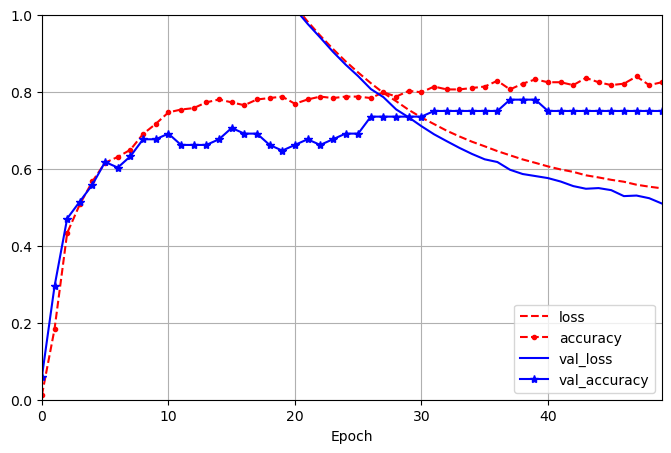

In [133]:
pd.DataFrame(history.history).plot(figsize=(8,5), xlim=[0,49], ylim=[0,1], grid=True, xlabel='Epoch', style=['r--','r--.','b-','b-*'])
plt.show()

You can see that both training accurancy and validation accuracy increase during the traning while the traning loss and validation loss decrease. This good. The validation lines are at most the same but at the end we've some overfitting at the end appears. The accuracy with this hyperparmeters is always higher than the validation accuracy, this also good. But we're not satisifed because we want both function closer and distinct.. Let's try to do a further exploration, if we fail we use kera-tuners and said in one of recommended books.

In [134]:
model.evaluate(X_test_scaled, y_test)

3/3 [==============================] - 0s 7ms/step - loss: 0.6136 - accuracy: 0.7381


[0.6135997772216797, 0.738095223903656]

Yep. It is normal having a lower accuracy in the test set because the accuracy is trained on the validation set (2% of training set), but it is not acceptable to have less then 80 percent of accuracy for a classifier.

In [135]:
X_test_sample = X_test_scaled 
class_probability = model.predict(X_test_sample)
class_probability.round(2)

3/3 [==============================] - 0s 2ms/step


array([[0.  , 0.26, 0.28, 0.43, 0.  , 0.01, 0.01, 0.01, 0.  ],
       [0.01, 0.06, 0.03, 0.05, 0.01, 0.04, 0.73, 0.04, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.99, 0.  ],
       [0.  , 0.01, 0.01, 0.01, 0.  , 0.09, 0.77, 0.09, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.97, 0.  ],
       [0.  , 0.19, 0.42, 0.35, 0.  , 0.01, 0.01, 0.01, 0.01],
       [0.  , 0.28, 0.37, 0.34, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.27, 0.15, 0.39, 0.01, 0.02, 0.11, 0.03, 0.01],
       [0.  , 0.3 , 0.41, 0.27, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.22, 0.45, 0.3 , 0.  , 0.01, 0.01, 0.01, 0.  ],
       [0.  , 0.14, 0.29, 0.5 , 0.  , 0.  , 0.04, 0.02, 0.  ],
       [0.  , 0.3 , 0.42, 0.23, 0.  , 0.02, 0.01, 0.01, 0.01],
       [0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.83, 0.13, 0.  ],
       [0.  , 0.25, 0.34, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.03, 0.02, 0.02, 0.01, 0.02, 0.84, 0.05, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.99,

Let's try for a moment to normalize the input and see if we can have better accuracy, also we can try to use kera-tuner in the process.

In [136]:
!pip install keras-tuner

/bin/bash: /home/jozoppi/pyconda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [137]:
import keras_tuner as kt

In [138]:
def build_model_tuner(hp):
    model = Sequential()
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,sampling='log')
    model.add(tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)))  # Adjust the input shape as necessary
    for i in range(hp.Int('num_layers', 1, 5)):
        # Tune the number of units in each layer
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu')
        )
    model.add(tf.keras.layers.Dense(9, activation='softmax'))  # Adjust the output layer as necessary
    optimizer = hp.Choice("optimizer", values=['sgd', 'adam'])
    optimizer_method = None
    if optimizer != "sgd":
        optimizer_method = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer_method = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer_method,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )    
    return model

Now we perform a random search passing build_model function to constructor.We don't fix the optimizer and increase the number of layers. We decide to use RandomSearch create the model and look for hyperparameters and increase the number of trials to 12. In this case we don't use Early Stopping it will take around 3 minutes in a machine with GeForce RTX.

In [139]:
tuner = kt.RandomSearch(
    build_model_tuner,
    objective='val_accuracy',
    max_trials=12,
    executions_per_trial=3,
    overwrite=True,
    directory='hps_ca2',
    project_name='hdip',
    seed=42
)
tuner.search(X_train_scaled, y_train, epochs=50,  validation_split = 0.2)

Trial 12 Complete [00h 00m 16s]
val_accuracy: 0.9558823506037394

Best val_accuracy So Far: 0.9558823704719543
Total elapsed time: 00h 03m 26s


Perfect we have around 90 per cent of accuracy on the validation data. Far better than before.

In [140]:
top3_models = tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [141]:
best_hps = tuner.get_best_hyperparameters(num_trials=3)
for hp in best_hps:
    print(hp.values)

{'learning_rate': 0.0009887195863122636, 'num_layers': 2, 'units_0': 256, 'optimizer': 'adam', 'units_1': 256}
{'learning_rate': 0.0043925333029596605, 'num_layers': 2, 'units_0': 192, 'optimizer': 'adam', 'units_1': 160, 'units_2': 32, 'units_3': 160, 'units_4': 32}
{'learning_rate': 0.0006951671294413008, 'num_layers': 5, 'units_0': 160, 'optimizer': 'adam', 'units_1': 96, 'units_2': 64, 'units_3': 96, 'units_4': 128}


In [142]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 70,665
Trainable params: 70,665
Non-trainable params: 0
_________________________________________________________________


The summarry give use the structure:
- 9 neurons input the data
- 192 neurons to dense
- 192 neuron dense
- 9 neurons with the function softmax.

In [143]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 0s 22ms/step - loss: 0.5418 - accuracy: 0.8470 - val_loss: 0.5122 - val_accuracy: 0.7500
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5386 - accuracy: 0.8284 - val_loss: 0.5019 - val_accuracy: 0.7500
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 0.5336 - accuracy: 0.8321 - val_loss: 0.5025 - val_accuracy: 0.7647
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5278 - accuracy: 0.8284 - val_loss: 0.4958 - val_accuracy: 0.7647
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5237 - accuracy: 0.8321 - val_loss: 0.4948 - val_accuracy: 0.7647
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5194 - accuracy: 0.8246 - val_loss: 0.4966 - val_accuracy: 0.7647
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5150 - accuracy: 0.8284 - val_loss: 0.4846 - val_accuracy: 0.7647
Epoch 8/50
9/9 [============

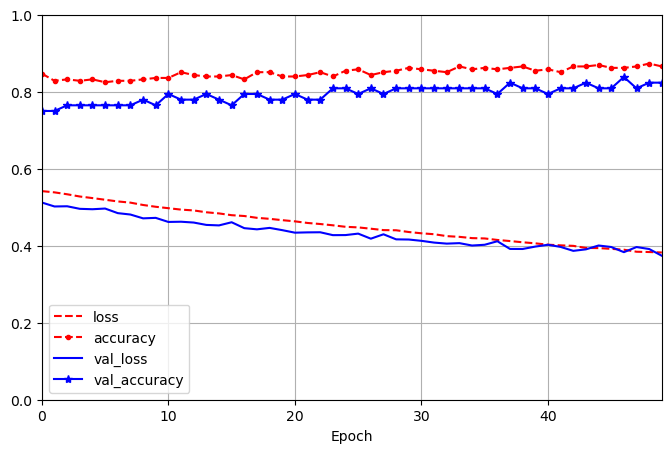

In [144]:
pd.DataFrame(history.history).plot(figsize=(8,5), xlim=[0,49], ylim=[0,1], grid=True, xlabel='Epoch', style=['r--','r--.','b-','b-*'])
plt.show()

Excellent. The loss functions goe together with no variation so no overfitting or underfitting. Ad the accuracy is increasing but 
with some variations. This graph is far better than before.

# Conclusion.
We've cleaned the data using various data exploration techniques. The dataset was not ablancedWe've crafted a neural network that is able to classify the type of glass with accuracy around 0.95 using kera-tuner. We're able to reach a good result to our classifier and predict the probability of each class in effective way.